In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/tmp/ipykernel_7091/2672164749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata.sort_values(by=['studytime'],inplace=True)


     studytime  avg_grade
197          1   9.333333
150          1   3.666667
151          1  13.000000
153          1   1.666667
154          1  11.333333


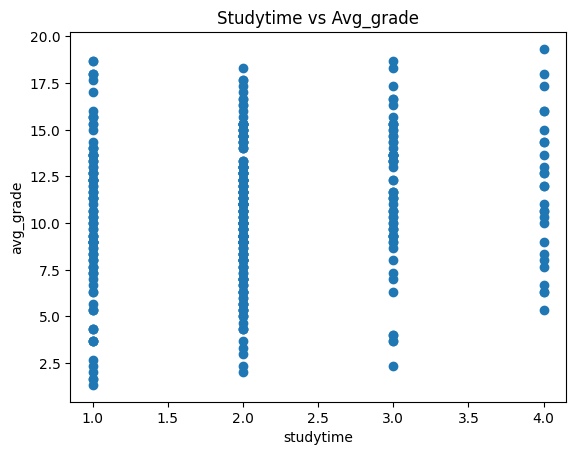

In [28]:
#QN1
data=pd.read_excel('studnets.xlsx')
data['avg_grade']=(data['G1']+data['G2']+data['G3'])/3
newdata=data[['studytime','avg_grade']]
newdata.sort_values(by=['studytime'],inplace=True)
print(newdata.head())
plt.scatter(newdata['studytime'],newdata['avg_grade'])
plt.xlabel('studytime')
plt.ylabel('avg_grade')
plt.title('Studytime vs Avg_grade')
plt.show()



In [29]:
#D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(newdata['studytime'], newdata['avg_grade'], test_size=0.2)

#due to the error, we need to reshape the data
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse=mean_squared_error(y_test, y_pred)
print("MeanSquaredError: ",mse)



MeanSquaredError:  15.58839855106135


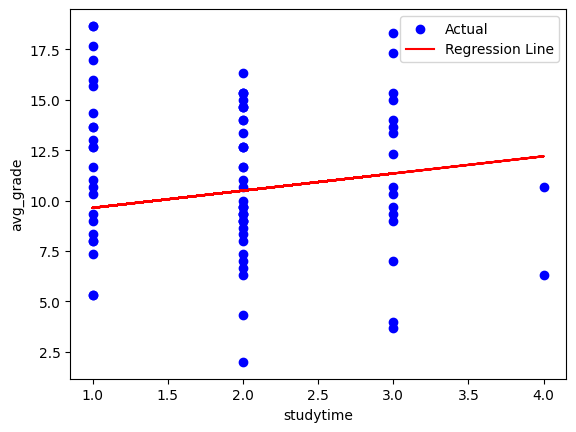

In [31]:
plt.scatter(X_test, y_test, marker='o', label='Actual', color='blue')
plt.plot(X_test, y_pred, label='Regression Line', color='red')
plt.xlabel('studytime')
plt.ylabel('avg_grade')
plt.legend()
plt.show()

In [33]:
#E
def normalize_feature(A):
    return (A - np.mean(A)) / np.std(A)

def gradient_descent(alpha, x,y, max_iter=1500):
    m = len(y)
    x = normalize_feature(x)
    x = np.c_[np.ones((m,1)), x]

    n= x.shape[1]

    theta = np.zeros(n)

    for _ in range(max_iter):
        predictions = np.dot(x, theta)
        errors = np.subtract(predictions, y)
        gradient = np.dot(x.transpose(), errors) / m
        theta = theta - alpha * gradient
        cost = np.sum(errors ** 2) / (2 * m)
    return theta,cost

In [35]:
#f
alphas = np.arange(0.1, 1.0, 0.1)

for alpha in alphas:
    theta, cost = gradient_descent(alpha, newdata['studytime'], newdata['avg_grade'])
    print(f'Learning rate: {alpha:.1f}, theta: {theta}, cost: {cost}')

Learning rate: 0.1, theta: [10.67932489  0.49682683], cost: 6.69239454434365
Learning rate: 0.2, theta: [10.67932489  0.49682683], cost: 6.692394544343651
Learning rate: 0.3, theta: [10.67932489  0.49682683], cost: 6.692394544343651
Learning rate: 0.4, theta: [10.67932489  0.49682683], cost: 6.69239454434365
Learning rate: 0.5, theta: [10.67932489  0.49682683], cost: 6.69239454434365
Learning rate: 0.6, theta: [10.67932489  0.49682683], cost: 6.69239454434365
Learning rate: 0.7, theta: [10.67932489  0.49682683], cost: 6.69239454434365
Learning rate: 0.8, theta: [10.67932489  0.49682683], cost: 6.69239454434365
Learning rate: 0.9, theta: [10.67932489  0.49682683], cost: 6.69239454434365


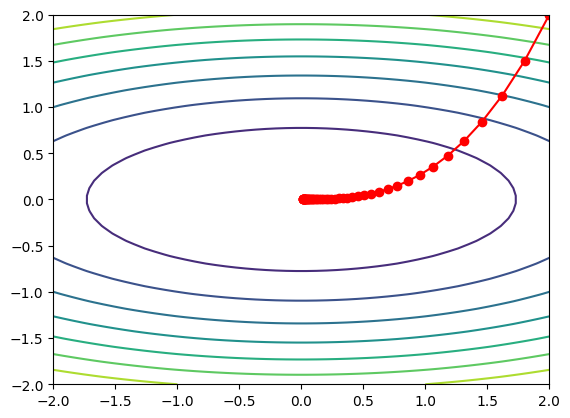

In [38]:
def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def gradient(x):
    return np.array([x[0],2.5*x[1]])

alpha = 0.1
x = np.array([2,2])
history = [x]

for i in range(50):
    x = x - alpha * gradient(x)
    history.append(x)

history = np.array(history)
xmesh, ymesh = np.mgrid[-2:2:50j, -2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
plt.contour(xmesh, ymesh, fmesh)
plt.plot(history[:,0], history[:,1], 'o-', color='red')
plt.show()

In [39]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
x = newdata['studytime'].values.reshape(-1, 1) # Assuming df1 is the DataFrame containing the data
y = newdata['avg_grade'].values
kf = KFold(n_splits=5, random_state=None)
for train_index, test_index in kf.split(x):
#print("Train:", train_index, "\nValidation:",test_index)
    X_train, X_test = x[train_index], x[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Training the Model
    model = LinearRegression()
    model.fit( X_train, Y_train.ravel() )
    # Predicting Test Data Set
    Y_pred = model.predict( X_test )
    # Evaluation metrics
print("ME: ", np.mean(Y_pred - Y_test))
print("MAE: ", mean_absolute_error(Y_test, Y_pred))
print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(Y_test, Y_pred)))
print("\n\n")

ME:  -0.23605153230254655
MAE:  3.1376103598618594
MSE:  14.705415902634234
RMSE:  3.834764126075323



